In [ ]:
# 1.0 References
# 2.0 Library imports
# 3.0 Function definitions
# 4.0 Data inputs
# 5.0 Remove plate label
    # 5.1 Find text color threshhold
    # 5.2 Set text color to null
# Edge detection
# Threshhold for agar vs. mycelium
# Count of agar
# Count of mycelium

In [ ]:
# 1.0 References
    # Open CV
    # https://www.udemy.com/the-python-mega-course/learn/v4/t/lecture/5941086
    # https://www.udemy.com/the-python-mega-course/learn/v4/t/lecture/5163302
    # https://www.udemy.com/the-python-mega-course/learn/v4/t/lecture/5163304
    # https://docs.scipy.org/doc/numpy/user/quickstart.html
    # https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed
    # https://www.geeksforgeeks.org/python-remove-part-of-an-image/
    # https://realpython.com/image-processing-with-the-python-pillow-library/

In [13]:
# 2.0 Import Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image

In [2]:
# 3.0 Function definitions
def display_img(img,cmap=None):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap)

In [3]:
# 4.0 Data input
img_raw_clr = cv2.imread("Mal2_image_code.jpg",1) # second argument: 0=gray-scale, 1=BGR (python is reverse of RGB)
img_raw_grey = cv2.imread("Mal2_image_code.jpg",0) # second argument: 0=gray-scale, 1=BGR (python is reverse of RGB)

In [5]:
img_raw_grey.shape

(2914, 3214)

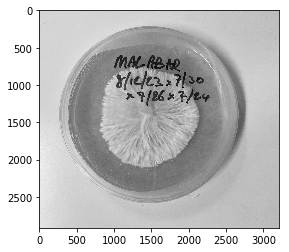

In [4]:
plt.imshow(img_raw_grey, cmap = 'gray');

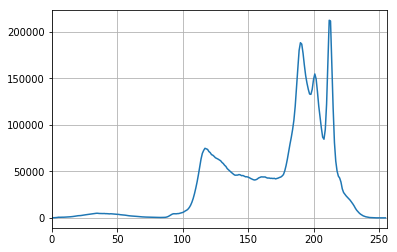

In [7]:
# 2.2 Analyze original image input object (look for non-binary content to establish white/black threshold point)
# black = 0
# white = 255
# distribution of white and black pixels
hist_values_img_raw_grey = cv2.calcHist([img_raw_grey],channels=[0],mask=None,histSize=[256],ranges=[0,256])
plt.grid(True)
plt.xlim([0,256])
plt.plot(hist_values_img_raw_grey);

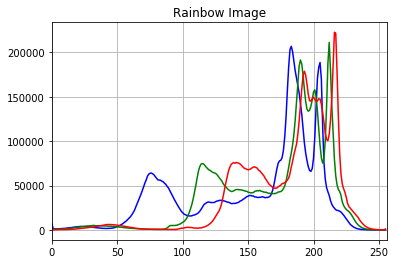

In [8]:
img = img_raw_clr
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Rainbow Image')
plt.grid(True)
plt.show();

In [9]:
# 5.0 Remove plate label/markings
# 5.1 Set a binary threshhold to isolate label color
max_val = 255
half_max = int(255/2)
ret,thresh_raw_grey = cv2.threshold(img_raw_grey,half_max,max_val,cv2.THRESH_BINARY)

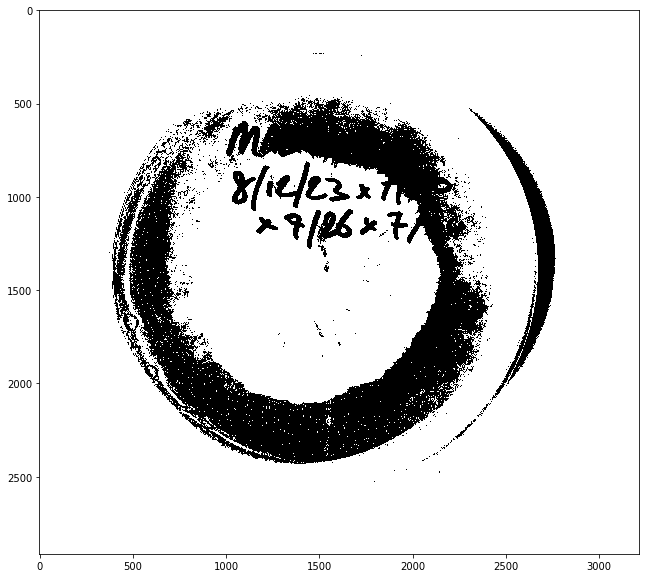

In [10]:
display_img(thresh_raw_grey, cmap='gray')

In [11]:
# 5.0 Remove plate label/markings
# 5.1 Set a binary threshhold to isolate label color
max_val = 175
half_max = int(max_val/2)
ret,thresh_raw_grey = cv2.threshold(img_raw_grey,half_max,max_val,cv2.THRESH_BINARY)

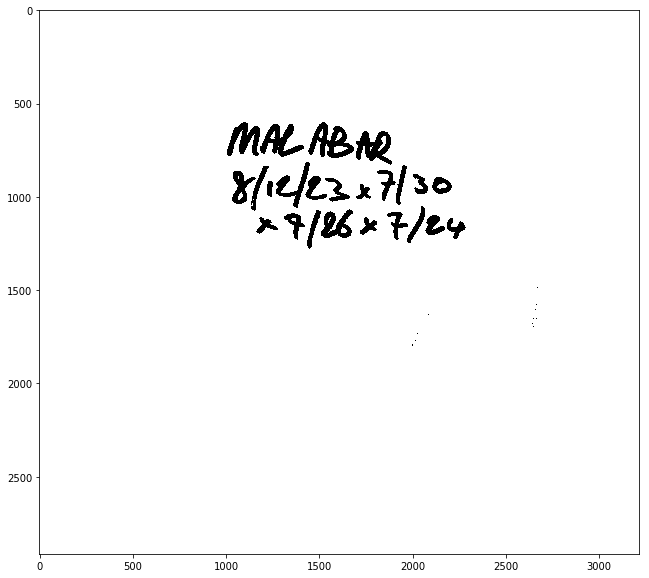

In [12]:
display_img(thresh_raw_grey, cmap='gray')

In [14]:
# 5.2 Subtract text image from original
img_raw_grey_array = np.asarray(img_raw_grey)
text_array = np.asarray(thresh_raw_grey)

In [15]:
img_raw_notext_array = np.asarray(img_raw_grey) - np.asarray(thresh_raw_grey)

In [16]:
img_raw_notext = Image.fromarray(img_raw_notext_array)

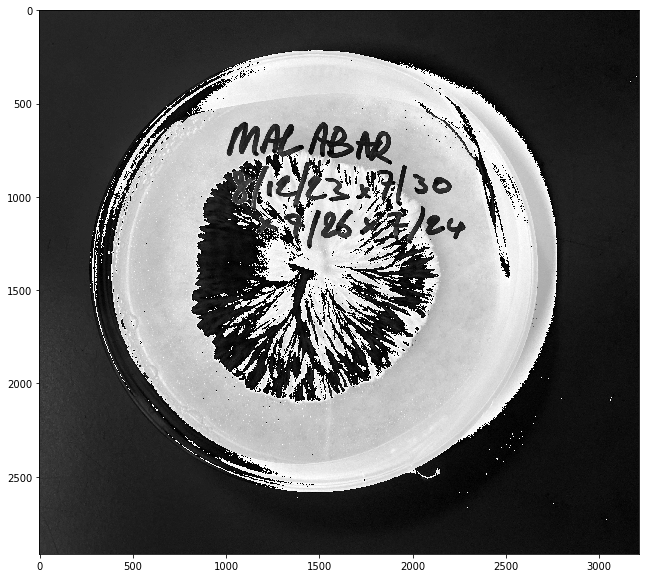

In [19]:
display_img(img_raw_notext, cmap='gray') #fail - still has the text. Need to figure out how to zero content marked in text
# it might require making everything except text null

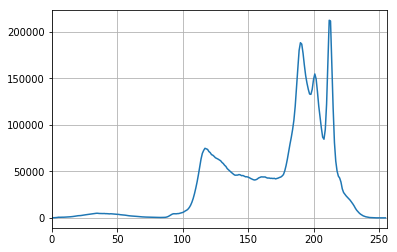

In [20]:
# Try: make text image into letters and null - the text part to be the only content
# What's in it before any more changes?
hist_values_img_raw_grey = cv2.calcHist([img_raw_grey],channels=[0],mask=None,histSize=[256],ranges=[0,256])
plt.grid(True)
plt.xlim([0,256])
plt.plot(hist_values_img_raw_grey);

In [30]:
# make non-black content  = null?
# black = 0
# white = 255

text_array = np.asarray(thresh_raw_grey)

text_array[text_array <= 175] = 0
text_array[text_array > 175] = 255

In [31]:
text_img_adj = Image.fromarray(text_array)

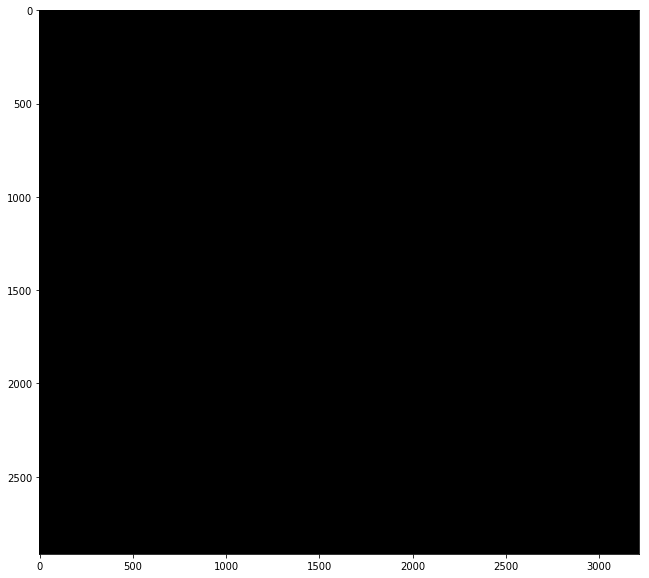

In [32]:
display_img(text_img_adj, cmap='gray')

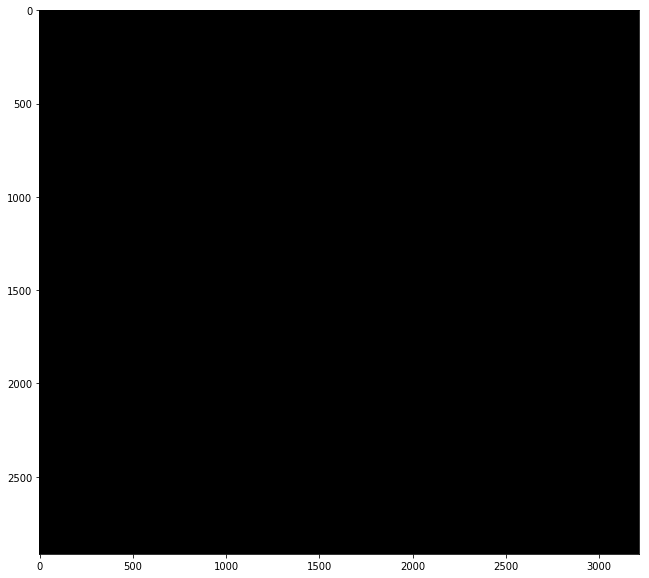

In [36]:
# make non-black content  = null?
# black = 0
# white = 255
text_array = np.asarray(thresh_raw_grey)
text_img_adj = Image.fromarray(text_array)

text_array[text_array <= 50] = 0
text_array[text_array > 50] = 255

text_img_adj = Image.fromarray(text_array)

display_img(text_img_adj, cmap='gray')

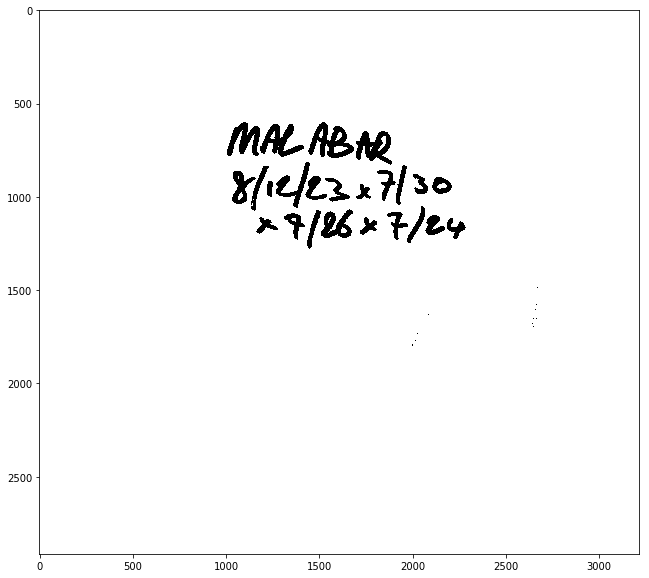

In [38]:
max_val = 175
half_max = int(max_val/2)
ret,thresh_raw_grey = cv2.threshold(img_raw_grey,half_max,max_val,cv2.THRESH_BINARY)

display_img(thresh_raw_grey, cmap='gray')

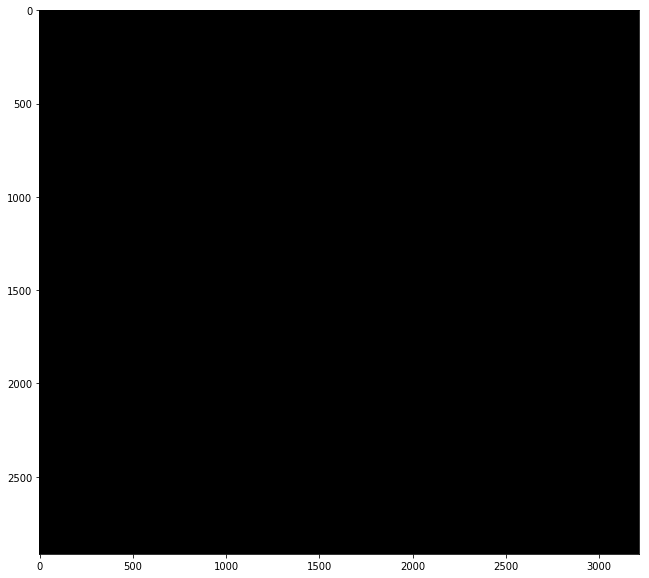

In [40]:
text_array1 = np.asarray(thresh_raw_grey)
text_img_adj = Image.fromarray(text_array1)

text_array1[text_array1 <= 50] = 0
text_array1[text_array1 > 50] = 255

text_img_adj = Image.fromarray(text_array1)

display_img(text_img_adj, cmap='gray')